In [35]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [42]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shap
import xgboost as xgb
import yaml

from functools import partial
from pathlib import Path

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score

# local imports
from hydra import compose, initialize
from src.data_processing.model_analyzers.xgb_analyzers.XGBRegAnalyzer import XGBRegAnalyzer, XGBRegAnalyzerFactory
from src.data_processing.model_analyzers.xgb_analyzers.XGBRegrResults import XGBRegrResults

# Dopamine Only

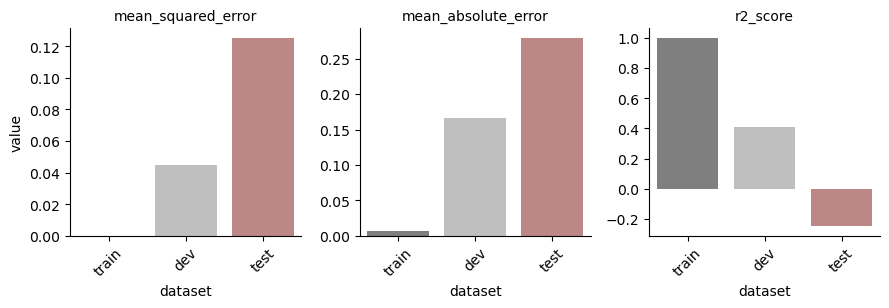

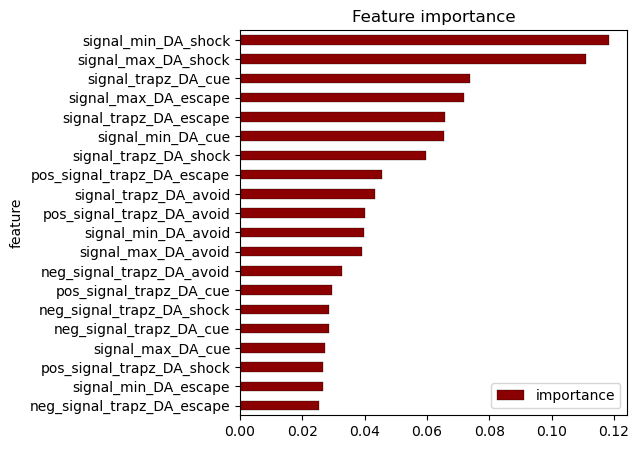

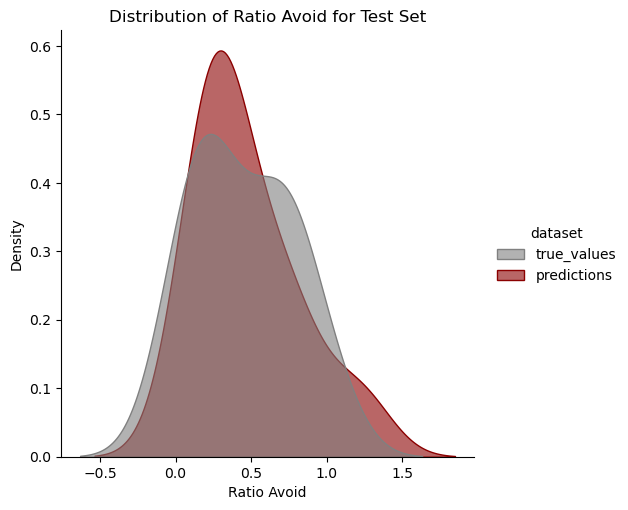

{'gamma': 0,
 'learning_rate': 0.505,
 'max_depth': 9,
 'min_child_weight': 2,
 'n_estimators': 250,
 'reg_lambda': 3.4000000000000004,
 'subsample': 0.2}

In [95]:
da_only_path = '/projects/p31961/ENIGMA/results/experiments/xgb_regression_da_only_hyperopt_tune'

results = XGBRegrResults(da_only_path)
analyzer = XGBRegAnalyzer(results)


analyzer.fit_best_xgb_model()
analyzer.plot_model_results()
results.best_params

# Elastic Net Regularization  =  using L1 and L2

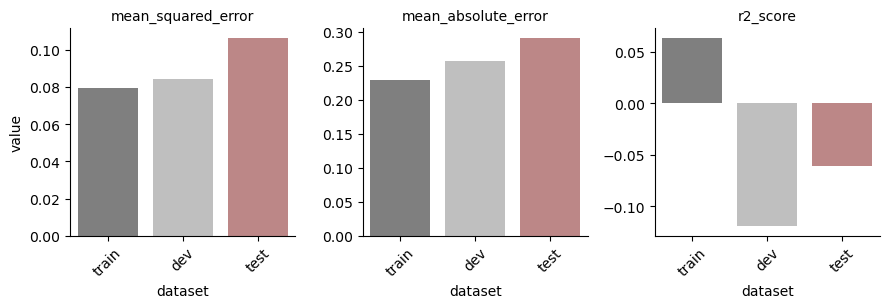

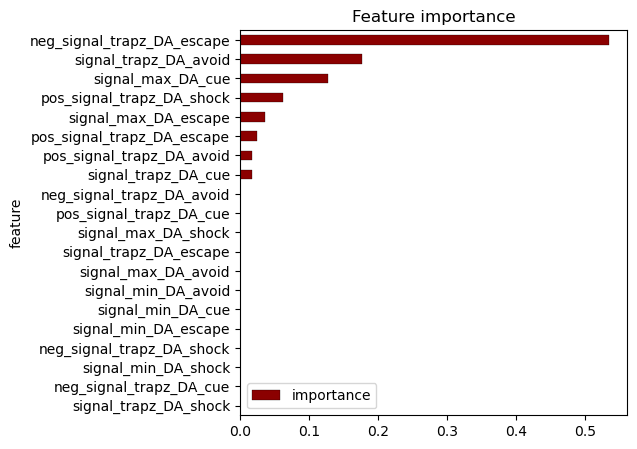

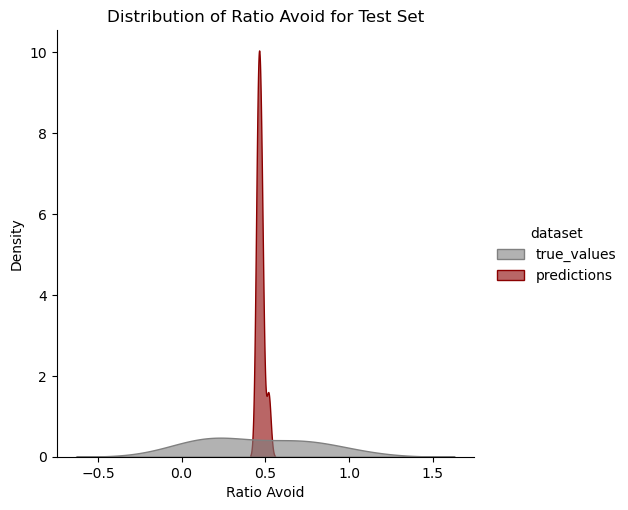

In [96]:
hyperopt_results = '/projects/p31961/ENIGMA/results/experiments/xgb_regression_da_only_hyperopt_tune/hyper_opt_results.parquet'
# results.best_params['gamma'] = 0.



results.best_params.update(alpha = 3)
results.best_params['lambda'] = 4
results.best_params
analyzer = XGBRegAnalyzer(results)
analyzer.fit_best_xgb_model()
analyzer.plot_model_results()

# what i think we should do
*  show model performance with all features
*  penalize with elastic net
*  show improved performance 
*  reintroduce day (and mouse id?)
*  show model doesn't change (bc unimportant features are penalized)
*  do n = 10?

# Dopamine with Day

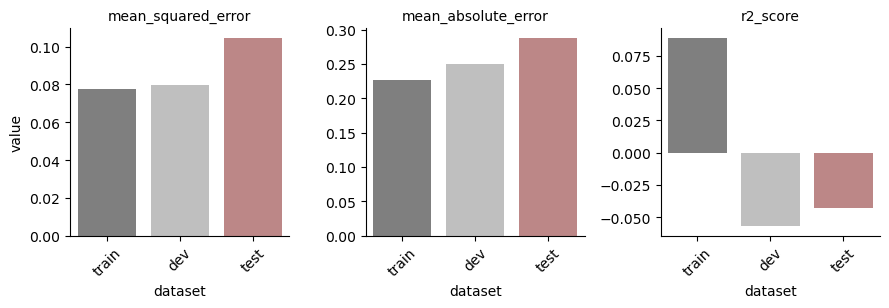

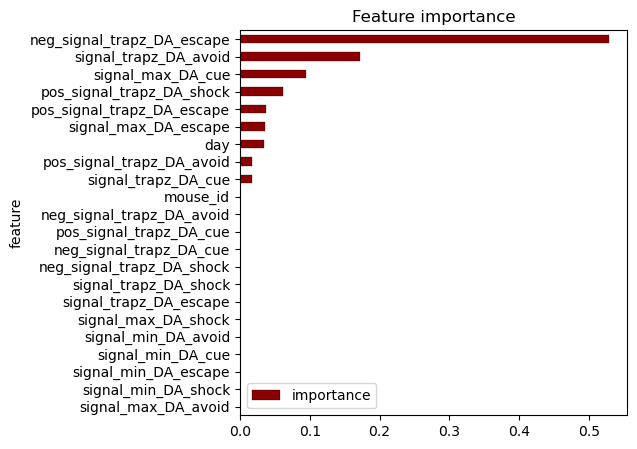

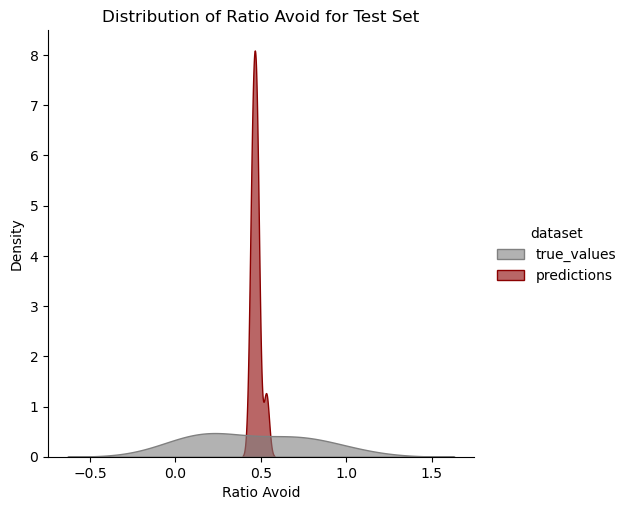

In [98]:

da_with_day_path = '/projects/p31961/ENIGMA/results/experiments/xgb_regression_da_only_hyperopt_tuneS_with_day'


analyzer2 = XGBRegAnalyzer(results)
analyzer2.create_pipeline(cls_to_drop=[])
analyzer2.fit_best_xgb_model()
analyzer2.plot_model_results()

In [ ]:
analyzer.plot_shap_results()

# DA + D1 only


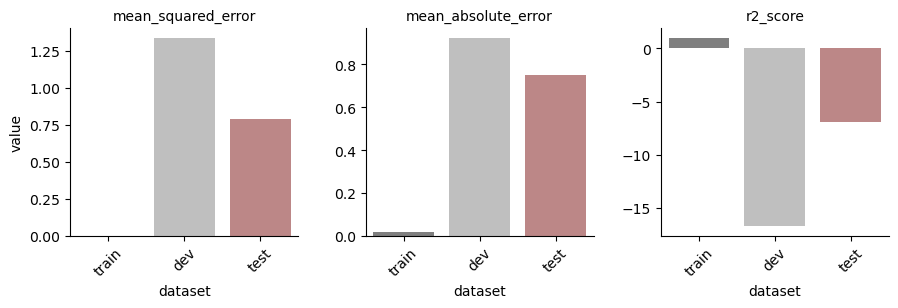

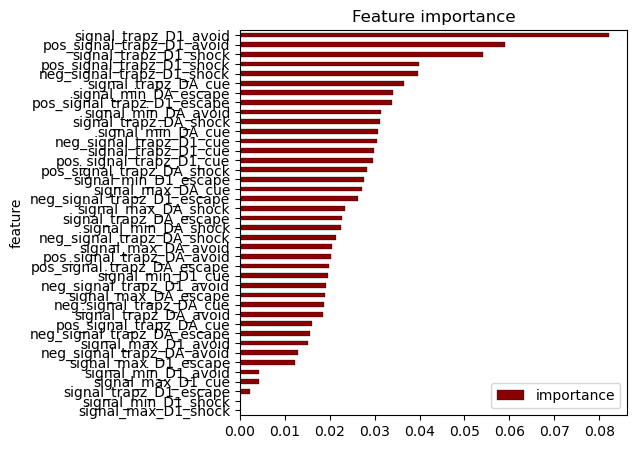

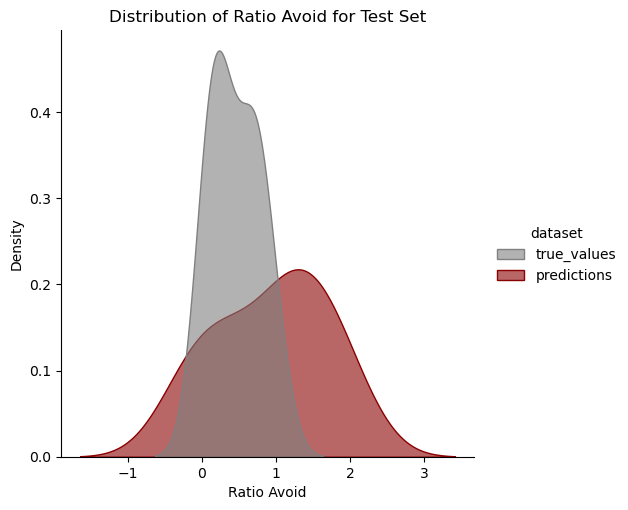

In [91]:
da_d1_path = '/projects/p31961/ENIGMA/results/experiments/xgb_regression_da_and_d1_hyperopt_tune'
results = XGBRegrResults(da_d1_path)
analyzer = XGBRegAnalyzer(results)
analyzer.fit_best_xgb_model()
analyzer.plot_model_results()

In [ ]:
analyzer.plot_shap_results()

# DA + D1 with Day

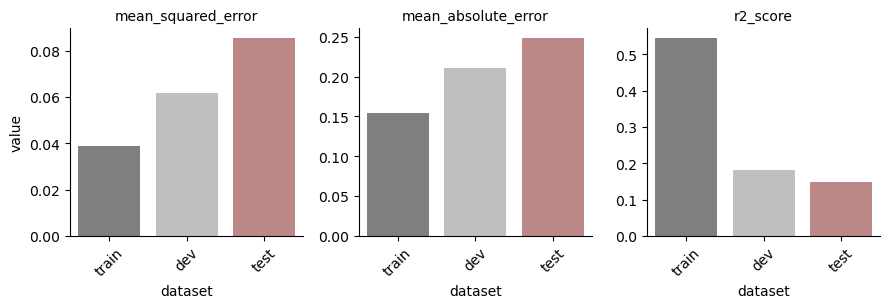

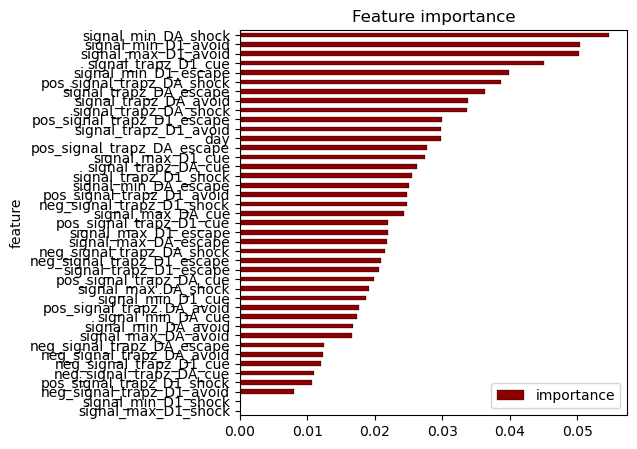

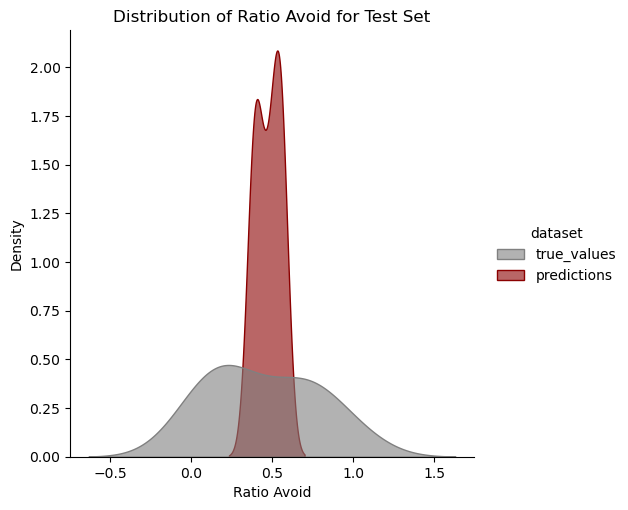

In [92]:
da_d1_with_day_path = '/projects/p31961/ENIGMA/results/experiments/xgb_regression_da_and_d1_hyperopt_tune_with_day'
results = XGBRegrResults(da_d1_with_day_path)
analyzer = XGBRegAnalyzer(results)
analyzer.create_pipeline(cls_to_drop=['mouse_id'])
analyzer.fit_best_xgb_model()
analyzer.plot_model_results()

In [ ]:
analyzer.plot_shap_results()

# DA + D2 Only

In [ ]:
da_d2_path = '/projects/p31961/ENIGMA/results/experiments/xgb_regression_da_and_d2_hyperopt_tune'
results = XGBRegrResults(da_d2_path)
analyzer = XGBRegAnalyzer(results)
analyzer.fit_best_xgb_model()
analyzer.plot_model_results()

In [ ]:
analyzer.plot_shap_results()

# DA + D2 with Day

In [ ]:
da_d2_with_day_path = '/projects/p31961/ENIGMA/results/experiments/xgb_regression_da_and_d2_hyperopt_tune_with_day'
results = XGBRegrResults(da_d2_with_day_path)
analyzer = XGBRegAnalyzer(results)
analyzer.create_pipeline(cls_to_drop=['mouse_id'])
analyzer.fit_best_xgb_model()
analyzer.plot_model_results()

In [ ]:
analyzer.plot_shap_results()